In [25]:
#spam detection assignment 1:
#Name : NKEN ALLASSAN
#Data: 21/08/2020
#this model try to demonstrate how to classify spam sms from non-spam ones

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
#importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import feature_extraction,metrics,svm ,naive_bayes,model_selection

In [28]:
#know lets load our data:
#Nb: got an error while loading data on encoding with "utf-8", so i searched and use "latin-1"
df= pd.read_csv("/content/drive/My Drive/datasets_483_982_spam.csv",encoding='latin-1')

In [29]:
#df.head()
df.shape

(5572, 5)

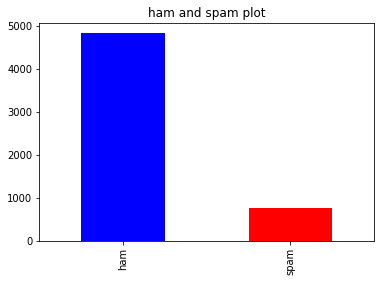

In [30]:
#try to get if the class is balance or not using a bar plot let check it out
counts=pd.value_counts(df['v1'],sort=True)
counts.plot(kind='bar',color=["blue","red"])
plt.title('ham and spam plot')
plt.show()

In [31]:
#from the result below we can deduce an imbalance classification problem
#Also in text classification we get more insights by eliminating stop words which can be consider as "noisy" to 
#the model

In [32]:
extract=feature_extraction.text.TfidfVectorizer(stop_words='english')
x=extract.fit_transform(df["v2"])
x.shape

(5572, 8404)

***now it's time to train our model***
1. we shall first use a svm model and improve later
2. also we shall see improvement with a balance class

In [33]:
#we start by doing a binary encoder
df['v1']=df['v1'].map({'spam':1,'ham':0})
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [36]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,df['v1'],test_size=0.33,random_state=42)

In [37]:
#we shall use our naive_bayes classifier and try to compare with the kaggle tuto LSTM result
bayes=naive_bayes.MultinomialNB(alpha=0.66)
bayes.fit(x_train,y_train)

MultinomialNB(alpha=0.66, class_prior=None, fit_prior=True)

In [38]:
score_train=bayes.score(x_train,y_train)
score_test=bayes.score(x_test,y_test)

In [42]:
#lets check out the test score 
print("the train accuracy is: {}".format(score_train))
print("the test accuracy is:  {}".format(score_test))

the train accuracy is: 0.989820519689258
the test accuracy is:  0.9760739532354541
